In [1]:
import os

import numpy as np 
import pandas as pd 

from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df_credits = pd.read_csv(os.path.join('data', 'original', 'credits.csv'))
df_keywords = pd.read_csv(os.path.join('data', 'original', 'keywords.csv'))
df_links = pd.read_csv(os.path.join('data', 'original', 'links.csv'))
df_movies = pd.read_csv(os.path.join('data', 'original', 'movies_metadata.csv'))
df_ratings = pd.read_csv(os.path.join('data', 'original', 'ratings.csv'))

C:\Users\PREDATOR HELIOS 300\AppData\Local\Temp\ipykernel_13972\1824330828.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(os.path.join('data', 'movies_metadata.csv'))


In [3]:
def count_missing_values(df):
    
    """Count missing values per column and calculate the percentage of missing values"""

    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percent})
    display_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

    if not display_df.empty:
        return display_df
    else:
        return "No missing values found."
    
def get_unique_keys(df_column):

    """Extract all unique keys from the dictionaries in the column."""
    
    keys = set()  
    for df_list in df_column:
        if isinstance(df_list, list):  
            for df_member in df_list:
                keys.update(df_member.keys())  
    return keys

def get_unique_values(df_column, key):

    """Extract all unique values for a specified key from the dictionaries in the 'crew' column."""
    
    jobs = set() 
    for crew_list in df_column:
        if isinstance(crew_list, list): 
            for crew_member in crew_list:
                jobs.add(crew_member[key])
    return jobs

def count_empty_lists(df, column_name):

    """Count rows with empty lists in a specified column """
    return df[column_name].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()

### **Understanding Dataset**

In [4]:
print("Columns in credits dataset:", df_credits.columns.tolist())
print("Columns in keywords dataset:", df_keywords.columns.tolist())
print("Columns in links dataset:", df_links.columns.tolist())
print("Columns in movies dataset:", df_movies.columns.tolist())
print("Columns in ratings dataset:", df_ratings.columns.tolist())

Columns in credits dataset: ['cast', 'crew', 'id']
Columns in keywords dataset: ['id', 'keywords']
Columns in links dataset: ['movieId', 'imdbId', 'tmdbId']
Columns in movies dataset: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Columns in ratings dataset: ['userId', 'movieId', 'rating', 'timestamp']


In [5]:
print("Shape of credits dataset:", df_credits.shape)
print("Shape of keywords dataset:", df_keywords.shape)
print("Shape of links dataset:", df_links.shape)
print("Shape of movies dataset:", df_movies.shape)
print("Shape of ratings dataset:", df_ratings.shape)

Shape of credits dataset: (45476, 3)
Shape of keywords dataset: (46419, 2)
Shape of links dataset: (45843, 3)
Shape of movies dataset: (45466, 24)
Shape of ratings dataset: (26024289, 4)


#### *1. Credits Dataset*

In [6]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
df_credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [8]:
df_credits.tail(2)

,cast,crew,id
45474,"[{'cast_id': 2, 'character': '', 'credit_id': '52fe4ea59251416c7515d7d5', 'gender': 2, 'id': 544742, 'name': 'Iwan Mosschuchin', 'order': 0, 'profile_path': None}, {'cast_id': 3, 'character': '', 'credit_id': '52fe4ea59251416c7515d7d9', 'gender': 1, 'id': 1090923, 'name': 'Nathalie Lissenko', 'order': 1, 'profile_path': None}, {'cast_id': 4, 'character': '', 'credit_id': '52fe4ea59251416c7515d7dd', 'gender': 2, 'id': 1136422, 'name': 'Pavel Pavlov', 'order': 2, 'profile_path': None}, {'cast_id': 5, 'character': '', 'credit_id': '52fe4ea59251416c7515d7e1', 'gender': 0, 'id': 1261758, 'name': 'Aleksandr Chabrov', 'order': 3, 'profile_path': None}, {'cast_id': 6, 'character': '', 'credit_id': '52fe4ea59251416c7515d7e5', 'gender': 1, 'id': 29199, 'name': 'Vera Orlova', 'order': 4, 'profile_path': '/n1NXVGNzNxtqsMWxLT1h8GO8Kpi.jpg'}]","[{'credit_id': '533bccebc3a36844cf0011a7', 'department': 'Directing', 'gender': 0, 'id': 1085341, 'job': 'Director', 'name': 'Yakov Protazanov', 'profile_path': '/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg'}, {'credit_id': '58ebbc26925141281908aa0a', 'department': 'Production', 'gender': 2, 'id': 1195656, 'job': 'Producer', 'name': 'Joseph N. Ermolieff', 'profile_path': None}]",227506
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'department': 'Directing', 'gender': 0, 'id': 1344495, 'job': 'Director', 'name': 'Daisy Asquith', 'profile_path': None}]",461257


In [9]:
df_credits['cast'] = df_credits['cast'].apply(literal_eval)
df_credits['crew'] = df_credits['crew'].apply(literal_eval)

##### *1.a. Cast*

In [10]:
unique_keys = get_unique_keys(df_credits['cast'])
print("Unique keys in the cast column:")
print(unique_keys)

Unique keys in the cast column:
{'credit_id', 'gender', 'character', 'name', 'order', 'profile_path', 'cast_id', 'id'}


In [11]:
empty_cast_count = count_empty_lists(df_credits, 'cast')
print(f"Number of rows in 'cast' column with empty lists: {empty_cast_count}")

Number of rows in 'cast' column with empty lists: 2418


##### *1.b. Crew*

In [12]:
unique_keys = get_unique_keys(df_credits['crew'])
print("Unique keys in the crew column:")
print(unique_keys)

Unique keys in the crew column:
{'credit_id', 'job', 'gender', 'name', 'profile_path', 'department', 'id'}


In [13]:
empty_crew_count = count_empty_lists(df_credits, 'crew')
print(f"Number of rows in 'crew' column with empty lists: {empty_crew_count}")

Number of rows in 'crew' column with empty lists: 771


In [14]:
unique_jobs = get_unique_values(df_credits['crew'], 'job')
print("Unique jobs in the crew column:")
print(unique_jobs)

Unique jobs in the crew column:
{'Foley', 'Conceptual Illustrator', 'Poem', 'Co-Director', 'Software Team Lead', 'Character Technical Supervisor', 'Assistant Production Coordinator', 'Key Costumer', '3D Animator', 'Grip', 'Steadycam', '3D Coordinator', 'Additional Photography', 'Animatronics Supervisor', 'Special Effects Supervisor', 'Battle Motion Coordinator', 'Music', 'Mixing Engineer', 'Video Game', 'Studio Teachers', 'Sound Mixer', 'Comic Book', 'Digital Effects Supervisor', '3D Modeller', 'Character Modelling Supervisor', 'Rigging Supervisor', 'Visual Effects', 'Digital Compositors', 'Radio Play', 'Marine Coordinator', 'Armory Coordinator', 'Consulting Producer', 'Set Production Intern', 'Associate Editor', 'In Memory Of', 'Theatre Play', 'CGI Supervisor', 'Sculptor', 'Assistant Production Manager', 'Shading', 'Key Set Costumer', 'Supervising Art Director', 'Sequence Artist', 'Motion Capture Artist', 'Production Sound Mixer', 'Visual Effects Coordinator', 'Publicist', 'Aerial Cam

In [15]:
unique_department = get_unique_values(df_credits['crew'], 'department')
print("Unique departments in the crew column:")
print(unique_department)

Unique departments in the crew column:
{'Writing', 'Sound', 'Camera', 'Editing', 'Costume & Make-Up', 'Crew', 'Directing', 'Production', 'Lighting', 'Actors', 'Visual Effects', 'Art'}


In [16]:
def get_jobs_per_department(crew_column):

    """Extract unique jobs per department"""
    
    department_jobs = {}
    for crew_list in crew_column:
        if isinstance(crew_list, list):
            for crew_member in crew_list:
                department = crew_member.get('department', 'Unknown')
                job = crew_member.get('job', 'Unknown')
                if department not in department_jobs:
                    department_jobs[department] = set()
                department_jobs[department].add(job)
    return department_jobs      


In [17]:
# Apply the function to the 'crew' column
jobs_per_department = get_jobs_per_department(df_credits['crew'])
for department, jobs in jobs_per_department.items():
    print(f"Department: {department}")
    print(f"Jobs: {jobs}\n")

Department: Directing
Jobs: {'Other', 'Continuity', 'Director', 'Layout', 'Script Supervisor', 'First Assistant Director', 'Special Guest Director', 'Assistant Director', 'Co-Director', 'Script Coordinator', 'Third Assistant Director', 'Second Assistant Director'}

Department: Writing
Jobs: {'Original Story', 'Creative Producer', 'Characters', 'Story Editor', 'Idea', 'Musical', 'Author', 'Script Consultant', 'Comic Book', 'Other', 'Writer', 'Short Story', 'Storyboard', 'Novel', 'Co-Writer', 'Adaptation', 'Book', 'Teleplay', 'Script Editor', 'Opera', 'Dialogue', 'Screenplay', 'Story', 'Scenario Writer', 'Theatre Play', 'Screenstory'}

Department: Production
Jobs: {'Assistant Production Manager', 'Script Researcher', 'Coordinating Producer', 'Production Supervisor', 'Casting', 'Casting Consultant', 'Producer', 'Publicist', 'Character Technical Supervisor', 'Assistant Production Coordinator', 'Executive Consultant', 'Production Office Coordinator', 'Co-Producer', 'Casting Assistant', 'Pro

#### *2. Keywords Dataset*

In [18]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [19]:
df_keywords.describe()

,id
count,46419.000000
mean,109769.951873
std,113045.780256
min,2.000000
25%,26810.500000
50%,61198.000000
75%,159908.500000
max,469172.000000


In [20]:
df_keywords.tail(2)

,id,keywords
46417,227506,[]
46418,461257,[]


In [21]:
df_keywords['keywords'] = df_keywords['keywords'].apply(literal_eval)

In [22]:
df_keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'name': 'based on children's book'}, {'id': 33467, 'name': 'new home'}, {'id': 158086, 'name': 'recluse'}, {'id': 158091, 'name': 'giant insect'}]"


In [23]:
unique_keys = get_unique_keys(df_keywords['keywords'])
print("Unique keys in the keywords column:")
print(unique_keys)

Unique keys in the keywords column:
{'id', 'name'}


In [24]:
empty_keywords_count = count_empty_lists(df_keywords, 'keywords')
print(f"Number of rows in 'keywords' column with empty lists: {empty_keywords_count}")

Number of rows in 'keywords' column with empty lists: 14795


In [25]:
unique_names = get_unique_values(df_keywords['keywords'], 'name')
print("Count of unique names in the keywords column:")
print(len(unique_names))

Count of unique names in the keywords column:
19956


#### *3. Links Dataset*

In [26]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [27]:
df_links.describe()

,movieId,imdbId,tmdbId
count,45843.000000,4.584300e+04,45624.000000
mean,96578.775626,9.937080e+05,108661.382847
std,57216.863469,1.361924e+06,112665.970830
min,1.000000,1.000000e+00,2.000000
25%,49202.500000,8.333050e+04,26502.750000
50%,108799.000000,2.839910e+05,60178.000000
75%,145270.500000,1.538311e+06,157849.500000
max,176279.000000,7.158814e+06,469172.000000


In [28]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


tmdbID = id in credits dataset and keywords dataset  
movieId = movieId in ratings dataset
imdbId = imdbId in movies dataset

In [29]:
# Count missing values in df_links
missing_links = count_missing_values(df_links)
print("Missing values in links dataset:\n", missing_links)

Missing values in links dataset:
         Missing Values  Percentage
tmdbId             219    0.477717


#### *4. Movies Dataset*

In [30]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [31]:
df_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


In [32]:
missing_movies = count_missing_values(df_movies)
print("\nMissing values in movies dataset:\n", missing_movies)


Missing values in movies dataset:
                        Missing Values  Percentage
belongs_to_collection           40972   90.115691
homepage                        37684   82.883913
tagline                         25054   55.104914
overview                          954    2.098271
poster_path                       386    0.848986
runtime                           263    0.578454
status                             87    0.191352
release_date                       87    0.191352
imdb_id                            17    0.037391
original_language                  11    0.024194
revenue                             6    0.013197
spoken_languages                    6    0.013197
title                               6    0.013197
video                               6    0.013197
vote_average                        6    0.013197
vote_count                          6    0.013197
popularity                          5    0.010997
production_countries                3    0.006598
production_com

In [33]:
hashable_columns = ['id','imdb_id','title']
duplicate_count = df_movies.duplicated(subset=hashable_columns).sum()
print(f"Number of duplicate rows in df_movies (excluding unhashable columns): {duplicate_count}")
duplicate_rows = df_movies[df_movies.duplicated(subset=hashable_columns, keep=False)].sort_values(by='id')
print("Sample duplicate rows sorted by 'id':")
duplicate_rows.head()

Number of duplicate rows in df_movies (excluding unhashable columns): 30
Sample duplicate rows sorted by 'id':


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
676,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection of the Wall. Konrad, Sophie and three of their friends plan a daring escape to Western Germany. The attempt is successful, except for Konrad, who remains behind. From then on, and for the next 28 years, Konrad and Sophie will attempt to meet again, in spite of the Iron Curtain. Konrad, who has become a reputed Astrophysicist, tries to take advantage of scientific congresses outside Eastern Germany to arrange encounters with Sophie. But in a country where the political police, the Stasi, monitors the moves of all suspicious people (such as Konrad's sister Barbara and her husband Harald), preserving one's privacy, ideals and self-respect becomes an exhausting fight, even as the Eastern block begins its long process of disintegration.",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'name': 'Centre National de la Cinématographie', 'id': 310}, {'name': 'Odessa Films', 'id': 1712}, {'name': 'Canal+', 'id': 5358}, {'name': 'Bioskop Film', 'id': 5982}, {'name': 'Westdeutscher Rundfunk (WDR)', 'id': 7025}]","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection of the Wall. Konrad, Sophie and three of their friends plan a daring escape to Western Germany. The attempt is successful, except for Konrad, who remains behind. From then on, and for the next 28 years, Konrad and Sophie will attempt to meet again, in spite of the Iron Curtain. Konrad, who has become a reputed Astrophysicist, tries to take advantage of scientific congresses outside Eastern Germany to arrange encounters with Sophie. But in a country where the political police, the Stasi, monitors the moves of all suspicious people (such as Konrad's sister Barbara and her husband Harald), preserving one's privacy, ideals and self-respect becomes an exhausting fight, even as the Eastern block begins its long process of disintegration.",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'name': 'Centre National de la Cinématographie', 'id': 310}, {'name': 'Odessa Films', 'id': 1712}, {'name': 'Canal+', 'id': 5358}, {'name': 'Bioskop Film', 'id': 5982}, {'name': 'Westdeutscher Rundfunk (WDR)', 'id': 7025}]","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}",16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 16, 'name': 'Animation'}, {'id': 28, 'name': 'Action'}, {'id': 10751, 'name': 'Family'}]",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,"When Molly Hale's sadness of her father's disappearance get to her, she unknowingly uses the Unown to create her own dream world along with Entei, who she believes to be her father. When Entei kidnaps Ash's mom, Ash along with Misty & Brock invade the mansion looking for his mom and trying to stop the mysteries of Molly's Dream World and Entei!",6.480376,/5ILjS6XB5deiHop8SXPsYxXWVPE.jpg,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4 Kids Entertainment', 'id': 3035}, {'name': 'Nintendo', 'id': 12288}, {'name': 'Pikachu Project', 'id'

In [34]:
print("Dataframe shape:", df_movies.shape)
df_movies = df_movies.drop_duplicates(subset=hashable_columns, keep='first')
print("Duplicates removed. Updated dataframe shape:", df_movies.shape)

Dataframe shape: (45466, 24)
Duplicates removed. Updated dataframe shape: (45436, 24)


In [35]:
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [36]:
# Replace NaN values with an empty string or a default value
df_movies['belongs_to_collection'] = df_movies['belongs_to_collection'].fillna('[]').apply(literal_eval)
df_movies['genres'] = df_movies['genres'].fillna('[]').apply(literal_eval)
df_movies['production_companies'] = df_movies['production_companies'].fillna('[]').apply(literal_eval)
df_movies['production_countries'] = df_movies['production_countries'].fillna('[]').apply(literal_eval)
df_movies['spoken_languages'] = df_movies['spoken_languages'].fillna('[]').apply(literal_eval)

#### *4.a. adult column*

In [37]:
# Convert 'adult' column to boolean type
df_movies['adult'] = df_movies['adult'].apply(lambda x: True if str(x).lower() == 'true' else False)
df_movies['adult'] = df_movies['adult'].astype(bool)

In [38]:
adult_counts = df_movies['adult'].value_counts()
print("Count of False and True in 'adult' column:")
print(adult_counts) 

Count of False and True in 'adult' column:
adult
False    45427
True         9
Name: count, dtype: int64


In [39]:
adult_true_rows = df_movies[df_movies['adult'] == True].head(2)
print("Rows with 'adult' = True:")  
adult_true_rows

Rows with 'adult' = True:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19489,True,[],0,"[{'id': 27, 'name': 'Horror'}]",NaN,5422,tt0079642,it,Le notti erotiche dei morti viventi,A sailor takes an American businessman and his girlfriend to an island where the businessman wants to build a resort. Soon a weird voodoo couple show up and warn them of bad things that are going to happen. It doesn't take long for the zombies to show up and start chowing down on human flesh. The main characters do manage to fit in quite a bit of sex though.,1.420104,/tzVK7nTnzUiVeFSZhOAIHmrgXUS.jpg,"[{'name': 'Stefano Film', 'id': 6117}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Erotic Nights of the Living Dead,False,2.2,7.0
28701,True,[],0,"[{'id': 80, 'name': 'Crime'}]",http://www.imdb.com/title/tt0119931/,169158,tt0119931,en,Standoff,The FBI and Texas police make ready to storm the headquarters of a heavily armed sect of religious fanatics. But the operation goes horribly wrong and a couple of agents seek protection at an abandoned farm. But they are not the only ones there.,1.349745,/1VzwIa8HTykNiCCW8PBaJnyTvO8.jpg,"[{'name': 'Trimark Pictures', 'id': 4063}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Trust Will Get You Killed,Standoff,False,4.8,5.0


#### *4.b. belongs_to_collection column*

In [40]:
# Find keys of the first non-null value in 'belongs_to_collection'
non_null_collection = df_movies['belongs_to_collection'].dropna().iloc[0]
collection_keys = non_null_collection.keys() if isinstance(non_null_collection, dict) else None
print("Keys of 'belongs_to_collection':")
print(collection_keys)

Keys of 'belongs_to_collection':
dict_keys(['id', 'name', 'poster_path', 'backdrop_path'])


#### *4.c. numerical column*

In [41]:
# Convert 'budget' column to float64 type
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')
df_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,45433.0,4.224549e+06,1.742799e+07,0.0,0.0,0.0,0.0,3.800000e+08
revenue,45430.0,1.121288e+07,6.435213e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45173.0,9.412430e+01,3.841554e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45430.0,5.618329e+00,1.924139e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45430.0,1.099360e+02,4.914663e+02,0.0,3.0,10.0,34.0,1.407500e+04


In [42]:
# Count rows with 0 values in numerical columns
numerical_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
zero_counts = {}

for column in numerical_columns:
    zero_counts[column] = (df_movies[column] == 0).sum()

print("Number of rows with 0 values in numerical columns:")
for column, count in zero_counts.items():
    print(f"{column}: {count}")


Number of rows with 0 values in numerical columns:
budget: 36553
revenue: 38032
runtime: 1558
vote_average: 2995
vote_count: 2896


In [43]:
# Display sample rows with 0 runtime
zero_runtime_rows = df_movies[df_movies['runtime'] == 0]
print("Sample rows with 0 runtime:")
zero_runtime_rows.head()

Sample rows with 0 runtime:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
222,False,[],0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,61813,tt0112899,en,Dream Man,"Kris is a homicide cop with psychic abilities. She works to prove that the prime suspect in her latest case (the much younger husband of the millionaire victim) is innocent. But are her visions true, or planned by someone who knows what she can see?",0.155859,/7JbvfOA2hnWkSIJslAayK0AemDU.jpg,"[{'name': 'Keystone Pictures', 'id': 15709}, {'name': 'Dream Man Productions Inc', 'id': 52095}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]",1995-01-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dream Man,False,2.5,1.0
224,False,[],0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 14, 'name': 'Fantasy'}]",NaN,62488,tt0112854,it,Destiny Turns on the Radio,"Johnny Destiny burns into Las Vegas in his hot Plymouth RoadRunner, stopping only to pick up a stranger stranded in the desert. But then, things aren't always as they seem. Anything can happen in that town of many possibilities...especially since there's been some weird electrical disturbances. As the stranger, fresh out of prison, tries to put his life back together--to recover his money from an old bank heist and the girl he lost in doing the job--something keeps interfering with his plans. Is it fate...or just Destiny?",0.710671,/9iczUcmMLnOZ4Ltx3X3AEpbxTt4.jpg,"[{'name': 'Savoy Pictures', 'id': 11308}, {'name': 'Rysher Entertainment', 'id': 11661}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-04-28,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fate visits in ways you never expect,Destiny Turns on the Radio,False,5.3,9.0
398,False,[],0.0,[],NaN,172923,tt0112889,en,Dos Crímenes,"Greed and playing into the hand of providence provides the focus of this Mexican comedy adapted from a novel by Jorge Ibarguengoitia. Marcos, an architect, has just returned to the home of his wealthy uncle Ramon after squandering his money in Mexico City and subsequently finding himself falsely accused of a crime. Although he is flat-broke, he conceals this from Ramon, telling him that he has returned home to buy a local gold mine. Marcos finds the lies come easily as begins trying to induce his uncle to fund his endeavor. Irascible Ramon, who likes Marcos for his similar love of drinking and smoking is duped, but Ramon's sons are not fooled by Marcos. To them he is a threat, and they fear he will be placed in the will. Soon all of them are trying to out-manipulate each other. Even Ramon, who is not as innocent as he appears is involved in the mayhem.",0.233376,/1L15fJfWfOUK9Ht15OLLmgW90h8.jpg,[],[],1995-05-26,0.0,0.0,[],Released,NaN,Dos Crímenes,False,5.0,1.0
554,False,[],0.0,[],NaN,218473,tt0109226,en,"The Beans of Egypt, Maine","The Beans are poor, proud, hated by all, but alive in the sense that they struggle against their lot and support each other in time of trouble. Earlene lives across the street from the Bean's trailer, and the view from her window is better than any daytime television soap opera; especially Beal Bean, and especially Beal Bean shirtless. When Reuben Bean is sent to prison for resisting arrest for out-of-season deer hunting, Beal takes up with Reuben's woman Roberta. He also has a child by Earlene, with a triangle of sex complicated by poverty.",0.38247,NaN,[],[],1994-01-01,0.0,0.0,[],Released,NaN,"The Beans of Egypt, Maine",False,0.0,1.0
667,False,[],0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",NaN,221917,tt0114307,en,The Run of the Country,"An Irish lad (Matt Keeslar) who fled from his oppressive, widowed father (Albert Finney) falls for a girl (Victoria Smurfit) from an affluen

In [44]:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,[],65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",NaN,15602,tt0113228,en,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,False,6.5,92.0


#### *4.d. genres*

In [45]:
unique_keys = get_unique_keys(df_movies['genres'])
print("Unique keys in the genres column:")
print(unique_keys)

Unique keys in the genres column:
{'id', 'name'}


In [46]:
unique_names = get_unique_values(df_movies['genres'], 'name')
print("Unique names in the genres column:")
print(unique_names)

Unique names in the genres column:
{'Horror', 'Action', 'Mardock Scramble Production Committee', 'Aniplex', 'Foreign', 'Drama', 'Fantasy', 'Romance', 'Vision View Entertainment', 'Animation', 'TV Movie', 'Rogue State', 'Adventure', 'Music', 'Crime', 'Thriller', 'Science Fiction', 'Mystery', 'The Cartel', 'Sentai Filmworks', 'Pulser Productions', 'History', 'Western', 'Odyssey Media', 'Carousel Productions', 'Documentary', 'Telescene Film Group Productions', 'BROSTA TV', 'Comedy', 'War', 'GoHands', 'Family'}


In [47]:
empty_genres_count = count_empty_lists(df_movies, 'genres')
print(f"Number of rows in 'genres' column with empty lists: {empty_genres_count}")

Number of rows in 'genres' column with empty lists: 2442


#### *4.d. id*

In [48]:
# Count rows with missing 'id' and 'imdb_id' in df_movies
def count_missing_values_specific_columns(df, columns):
    missing_counts = {}
    for column in columns:
        missing_count = df[column].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        missing_counts[column] = {
            'Missing Count': missing_count,
            'Missing Percentage': missing_percentage
        }
    return missing_counts

columns_to_check = ['id', 'imdb_id']
missing_id_imdb = count_missing_values_specific_columns(df_movies, columns_to_check)

print("Missing values for 'id' and 'imdb_id':")
for column, stats in missing_id_imdb.items():
    print(f"{column}: {stats['Missing Count']} rows ({stats['Missing Percentage']:.2f}%)")

Missing values for 'id' and 'imdb_id':
id: 0 rows (0.00%)
imdb_id: 17 rows (0.04%)


In [49]:
duplicate_id_count = df_movies.duplicated(subset=['id']).sum()
print(f"Number of rows with duplicate 'id': {duplicate_id_count}")

Number of rows with duplicate 'id': 0


In [50]:
duplicate_imdb_id_count = df_movies.duplicated(subset=['imdb_id']).sum()
print(f"Number of rows with duplicate 'imdb_id': {duplicate_imdb_id_count}")

Number of rows with duplicate 'imdb_id': 18


#### *4.e. original_language, spoken_language*

In [51]:
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [52]:
# Count unique values and their frequency in 'original_language' and 'original_title' columns
original_language_counts = df_movies['original_language'].value_counts()

print("Unique values and their frequency in 'original_language':")
print(original_language_counts)

Unique values and their frequency in 'original_language':
original_language
en       32251
fr        2436
it        1529
ja        1347
de        1079
es         994
ru         826
hi         508
ko         444
zh         409
sv         383
pt         316
cn         313
fi         295
nl         248
da         224
pl         219
tr         150
cs         130
el         113
no         106
hu         100
fa         100
ta          78
th          75
he          67
sr          63
ro          57
te          45
ar          39
ml          36
xx          33
bn          29
hr          29
mr          25
is          24
et          24
tl          23
id          20
lv          18
ka          18
sl          17
uk          16
bs          14
ca          12
ab          10
vi          10
bg          10
sk           9
lt           9
ur           8
nb           6
sh           5
wo           5
sq           5
ms           5
mk           5
eu           3
kk           3
kn           3
ky           3
bm       

In [53]:
unique_keys = get_unique_keys(df_movies['spoken_languages'])
print("Unique keys in the spoken_languages column:")
print(unique_keys)

Unique keys in the spoken_languages column:
{'iso_639_1', 'name'}


In [54]:
unique_names = get_unique_values(df_movies['spoken_languages'], 'name')
print("Unique names in the genres column:")
print(unique_names)

Unique names in the genres column:
{'', 'Deutsch', 'Dansk', 'עִבְרִית', 'Latviešu', 'Srpski', '普通话', '?????', 'Bosanski', 'Nederlands', 'Türkçe', 'العربية', 'Hrvatski', 'فارسی', 'বাংলা', 'ozbek', 'हिन्दी', 'Íslenska', 'isiZulu', 'தமிழ்', 'Magyar', 'Eesti', 'Hausa', 'Kiswahili', 'Norsk', 'suomi', 'Slovenščina', 'български език', 'қазақ', 'Kinyarwanda', 'Afrikaans', 'svenska', 'ქართული', 'తెలుగు', 'Lietuvi\x9akai', 'Somali', 'Pусский', 'Malti', 'اردو', 'shqip', '日本語', 'Latin', '??????', 'Slovenčina', 'ภาษาไทย', 'Український', 'Polski', 'Wolof', 'Esperanto', 'Bahasa melayu', 'Cymraeg', 'No Language', '한국어/조선말', 'беларуская мова', 'Fulfulde', 'Español', 'Azərbaycan', 'ਪੰਜਾਬੀ', 'ελληνικά', 'euskera', 'پښتو', '广州话 / 廣州話', 'Italiano', 'Gaeilge', 'Português', 'Tiếng Việt', 'Català', 'Français', 'English', 'Română', 'Bokmål', 'Bamanankan', 'Bahasa indonesia', 'Galego', 'Český'}


#### *4.f. original_title, overview*

In [55]:
columns_to_check = ['original_title', 'overview']
missing_id_imdb = count_missing_values_specific_columns(df_movies, columns_to_check)

print("Missing values for 'original_title', 'overview':")
for column, stats in missing_id_imdb.items():
    print(f"{column}: {stats['Missing Count']} rows ({stats['Missing Percentage']:.2f}%)")

Missing values for 'original_title', 'overview':
original_title: 0 rows (0.00%)
overview: 954 rows (2.10%)


#### *4.g. production_companies, production_countries*

In [56]:
columns_to_check = ['production_companies', 'production_countries']
missing_id_imdb = count_missing_values_specific_columns(df_movies, columns_to_check)

print("Missing values for 'production_companies', 'production_countries':")
for column, stats in missing_id_imdb.items():
    print(f"{column}: {stats['Missing Count']} rows ({stats['Missing Percentage']:.2f}%)")

Missing values for 'production_companies', 'production_countries':
production_companies: 0 rows (0.00%)
production_countries: 0 rows (0.00%)


In [57]:
# Count unique production companies and production countries
def count_unique_items(df_column):
    unique_items = set()
    for item_list in df_column:
        if isinstance(item_list, list):
            for item in item_list:
                unique_items.add(item.get('name', 'Unknown'))
    return len(unique_items)

unique_production_companies = count_unique_items(df_movies['production_companies'])
unique_production_countries = count_unique_items(df_movies['production_countries'])

print(f"Number of unique production companies: {unique_production_companies}")
print(f"Number of unique production countries: {unique_production_countries}")

Number of unique production companies: 23537
Number of unique production countries: 160


#### *4.h. release_date*

In [58]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')

min_release_date = df_movies['release_date'].min()
max_release_date = df_movies['release_date'].max()

print(f"Minimum release date: {min_release_date}")
print(f"Maximum release date: {max_release_date}")

Minimum release date: 1874-12-09 00:00:00
Maximum release date: 2020-12-16 00:00:00


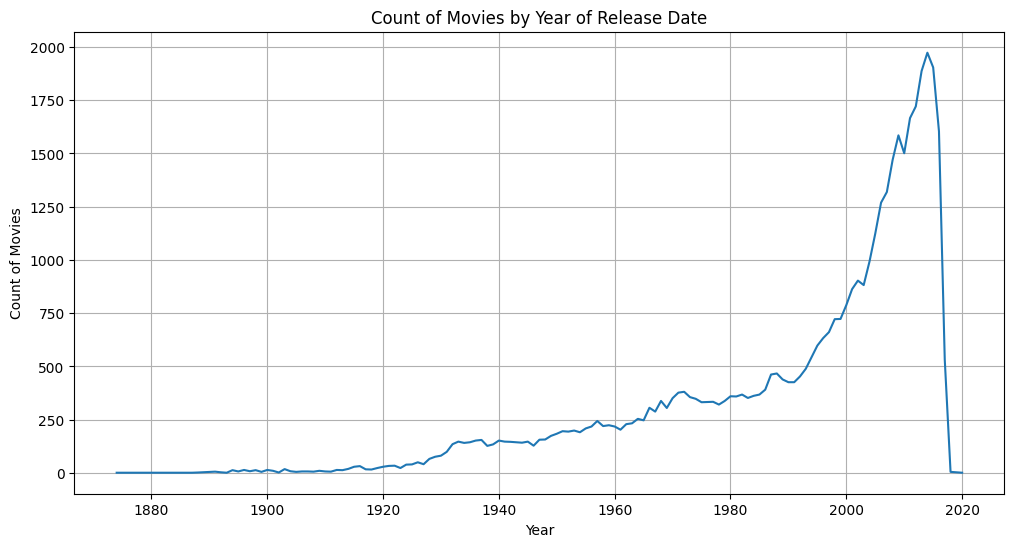

In [59]:
# Plot a line graph of the count of movies by year of release_date
# Extract year from release_date
df_movies['release_year'] = df_movies['release_date'].dt.year

# Group by year and count the number of movies
count_by_year = df_movies.groupby('release_year').size()

# Plot the line graph
plt.figure(figsize=(12, 6))
count_by_year.plot(kind='line')
plt.title('Count of Movies by Year of Release Date')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.grid(True)
plt.show()

#### *4.i. status*

In [60]:
status_counts = df_movies['status'].value_counts()
print("Unique values and their frequency in 'status':")
print(status_counts)

Unique values and their frequency in 'status':
status
Released           44985
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64


#### *4.j. video*

In [61]:
status_counts = df_movies['video'].value_counts()
print("Unique values and their frequency in 'video':")
print(status_counts)

Unique values and their frequency in 'video':
video
False    45337
True        93
Name: count, dtype: int64


In [62]:
video_true_rows = df_movies[df_movies['video'] == True].head()
print("Sample rows where 'video' is True:")
video_true_rows

Sample rows where 'video' is True:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year
5492,False,[],0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10749, 'name': 'Romance'}]",NaN,15173,tt0298388,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumber and the rest of the Veggies set sail on a whale of an adventure in Big Idea's first full-length, 3-D animated feature film. This is the story of Jonah and the Whale as you've never seen it before - a story where we learn that one of the best gifts you can give - or get - is a second chance.",1.734181,/iWahPsY3hsKOizZHgzQcAxv4O3B.jpg,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2002-10-04,0.0,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_639_1': 'en', 'name': 'English'}]",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0,2002.0
11469,False,"{'id': 123438, 'name': 'Loose Change Collection', 'poster_path': '/z1kQ7HZrj8ZSpapaXnM771ojy0k.jpg', 'backdrop_path': None}",5000.0,"[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,Loose Change: 2nd Edition,"What if...September 11th was not a surprise attack on America, but rather, a cold and calculated genocide by our own government?We were told that the twin towers were hit by commercial jetliners and subsequently brought down by jet fuel. We were told that the Pentagon was hit by a Boeing 757. We were told that flight 93 crashed in Shanksville, Pennsylvania. We were told that nineteen Arabs from halfway across the globe, acting under orders from Osama Bin Laden, were responsible. What you will see here will prove without a shadow of a doubt that everything you know about 9/11 is a complete fabrication. Conspiracy theory? It's not a theory if you can prove it.Written and narrated by Dylan Avery, this film presents a rebuttal to the official version of the September 11, 2001 terrorist attacks and the 9/11 Commission Report.",0.651714,/isRGTPFiX8IwM1dNXQ1SUoticvY.jpg,"[{'name': 'Polar Film Medien GmbH', 'id': 5228}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2006-06-01,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0,2006.0
13564,False,[],0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,Fitna,A short film in which Quran verses are shown alongside images from terrorist attacks.,0.040068,/2xZIYEyp6jUfB8ZMiqvtXRD6tSX.jpg,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,0.0,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Fitna,True,1.0,1.0,2008.0
14271,False,"{'id': 190135, 'name': 'Love Hina Collection', 'poster_path': '/U80lKUQt80eQPwOpKoHKcNHbpj.jpg', 'backdrop_path': '/4JAfHEwcc2FlOmACQ7Xc9OPv5fV.jpg'}",0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}, {'id': 16, 'name': 'Animation'}, {'id': 10402, 'name': 'Music'}]",NaN,44685,tt0416938,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope to succeed. However, in the final stretch, he fails miserably and daydreams through the test. Assuming that he has failed, he runs away, so the rest of the cast hunts him down on a remote desert island to bring him back.",1.785708,/pO535dqMmvatuqbgvpOIA1bQw3R.jpg,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'Xebec', 'id': 5937}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,0.0,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0,20

### *5. Ratings Dataset*

In [63]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [64]:
df_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,26024289.0,1.350371e+05,7.817620e+04,1.0,67164.0,1.351630e+05,2.026930e+05,2.708960e+05
movieId,26024289.0,1.584911e+04,3.108526e+04,1.0,1073.0,2.583000e+03,6.503000e+03,1.762750e+05
rating,26024289.0,3.528090e+00,1.065443e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,26024289.0,1.171258e+09,2.052889e+08,789652004.0,990754461.0,1.151716e+09,1.357578e+09,1.501830e+09


In [65]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [66]:
df_ratings['date'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings.head()

,userId,movieId,rating,timestamp,date
0,1,110,1.0,1425941529,2015-03-09 22:52:09
1,1,147,4.5,1425942435,2015-03-09 23:07:15
2,1,858,5.0,1425941523,2015-03-09 22:52:03
3,1,1221,5.0,1425941546,2015-03-09 22:52:26
4,1,1246,5.0,1425941556,2015-03-09 22:52:36


In [67]:
date_min = df_ratings['date'].min()
date_max = df_ratings['date'].max()
print(f"Minimum date in 'date' column: {date_min}")
print(f"Maximum date in 'date' column: {date_max}")

Minimum date in 'date' column: 1995-01-09 11:46:44
Maximum date in 'date' column: 2017-08-04 06:57:50


In [68]:
print("Shape of links dataset:", df_links.shape)
print("Shape of movies dataset:", df_movies.shape)
print("Shape of ratings dataset:", df_ratings.shape)

Shape of links dataset: (45843, 3)
Shape of movies dataset: (45436, 25)
Shape of ratings dataset: (26024289, 5)
